# Task 1 - Iris Flowers Classification ML Project

### Importing Necessary Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tabulate import tabulate
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\adity\Downloads\iris.data',header=None)
df.columns = ['SepalLenghCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [3]:
df.head()

,SepalLenghCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLenghCm   150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Checking for null values
df.isnull().sum()

SepalLenghCm     0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Unique species in the dataset
print(df['Species'].unique())
print("No. of unique species in the dataset:", df['Species'].nunique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
No. of unique species in the dataset: 3


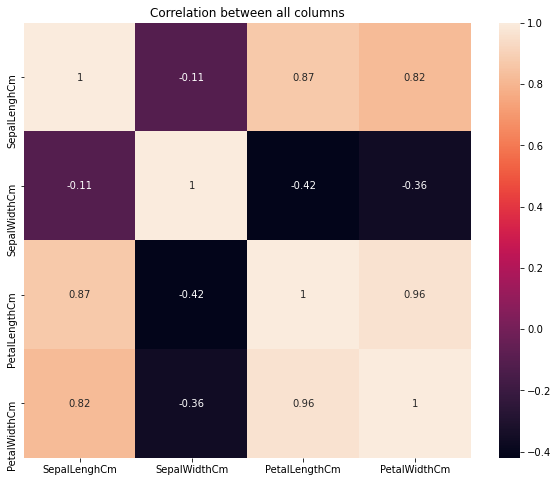

In [8]:
plt.figure(figsize=(10,8))
plt.title("Correlation between all columns")
sns.heatmap(data= df.corr(), cmap="rocket", annot=True)
plt.show()

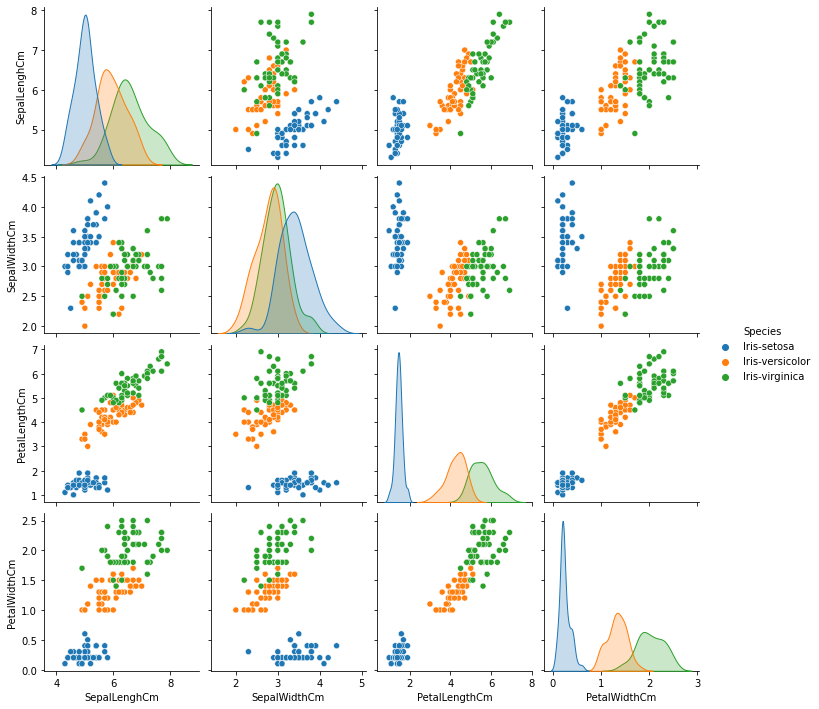

In [9]:
sns.pairplot(df, hue="Species");

In [10]:
X = df[['SepalLenghCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [11]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
y = df['Species'].values

In [13]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [14]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

In [15]:
print("Training set:",X_train.shape, y_train.shape)
print("Testing set:",X_test.shape, y_test.shape)

Training set: (90, 4) (90,)
Testing set: (60, 4) (60,)


In [16]:
#function for plotting comfusion matrix
def plot_cm(score):
    cm = metrics.confusion_matrix(y_test, yhat)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = f'Accuracy Score: {score:.2f}'
    plt.title(all_sample_title, size = 12)
    plt.show()

### K- Nearest Neighbors

In [17]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
yhat = neigh.predict(X_test)

In [19]:
yhat[:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [20]:
knn_acc = metrics.accuracy_score(y_test, yhat)

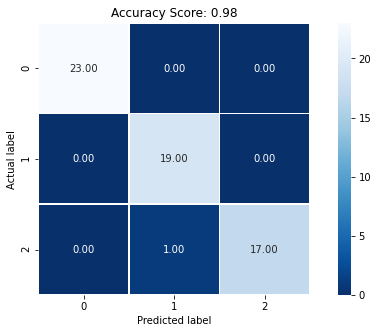

In [21]:
plot_cm(knn_acc)

In [22]:
print(classification_report(y_test, yhat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



### Support Vector Machine

In [23]:
clf = SVC(kernel='linear') 
clf.fit(X, y) 

SVC(kernel='linear')

In [24]:
yhat = clf.predict(X_test)

In [25]:
svm_acc =  metrics.accuracy_score(y_test, yhat)

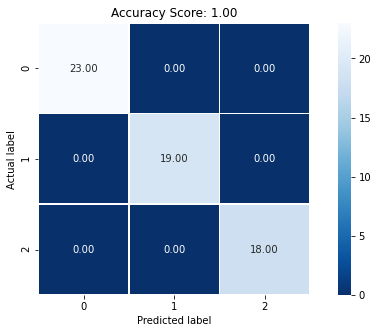

In [26]:
plot_cm(svm_acc)

In [27]:
print(classification_report(y_test, yhat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



### Logistic Regression

In [28]:
LG = LogisticRegression(random_state = 0)
LG.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
yhat = LG.predict(X_test)

In [30]:
lr_acc = metrics.accuracy_score(y_test, yhat)

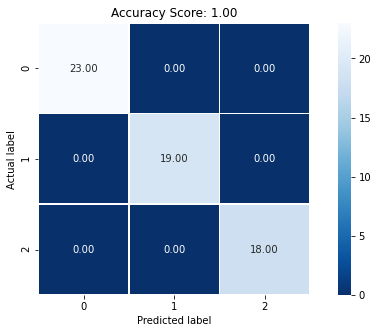

In [31]:
plot_cm(lr_acc)

In [32]:
print(classification_report(y_test, yhat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



### Decision Tree

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
yhat = dtree.predict(X_test)

In [35]:
dt_acc = metrics.accuracy_score(y_test, yhat)

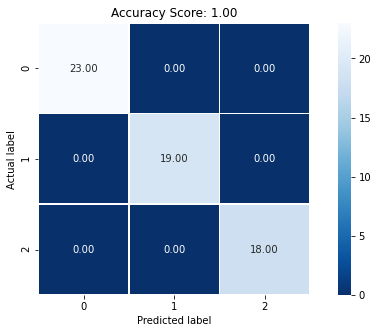

In [36]:
plot_cm(dt_acc)

In [37]:
print(classification_report(y_test, yhat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



In [38]:
acc = [['K-Nearest Neighbors', knn_acc], ['Support Vector Machine', svm_acc], ['Logistic Regression', lr_acc], ['Decision Tree', dt_acc]]
acc = pd.DataFrame(acc, columns = ['Classifier ', 'Accuracy'])
print(acc.to_markdown()) 

|    | Classifier             |   Accuracy |
|---:|:-----------------------|-----------:|
|  0 | K-Nearest Neighbors    |   0.983333 |
|  1 | Support Vector Machine |   1        |
|  2 | Logistic Regression    |   1        |
|  3 | Decision Tree          |   1        |
